# Diabetes Dataset Analysis 

The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

In [1]:
library(ggplot2)
library(dplyr)
library(gridExtra)
library(corrplot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

corrplot 0.84 loaded


**ggplot** is used for visualizations <br>
**dplyr** is used for data manipulation tasks<br>
**gridextra** is used for "Grid" Graphics Provides a number of user-level functions to work with "grid" graphics<br>
**corrplot** is used for plotting correlation


In [2]:
df <- read.csv('diabetes_zero.csv')

In [3]:
head(df)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [5]:
dim(df)

[1] 768   9

# Exploratory Data Analysis and Feature Selection

### Check missing values 

In [6]:
cat("Number of Missing values :",sum(is.na(df)),"\n")

Number of Missing values : 0 


### Statistical Summary

In [7]:
summary(df)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [8]:
df$Outcome <- factor(df$Outcome)

### Histogram of Numeric Values

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


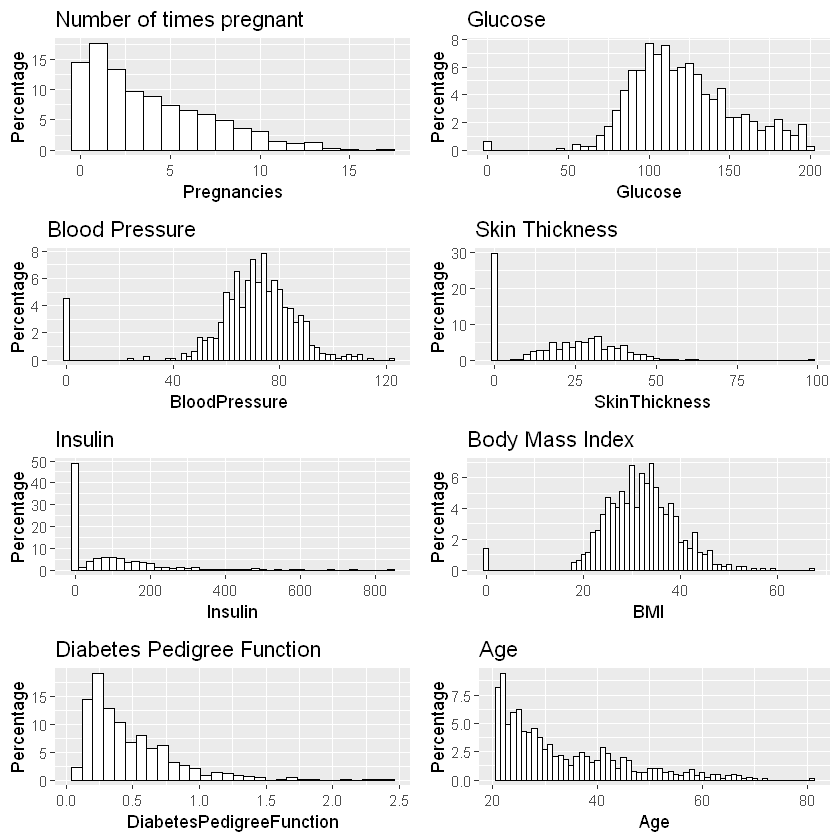

In [13]:
p1 <- ggplot(df, aes(x=Pregnancies)) + ggtitle("Number of times pregnant") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 1, colour="black", fill="white") + ylab("Percentage")
p2 <- ggplot(df, aes(x=Glucose)) + ggtitle("Glucose") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 5, colour="black", fill="white") + ylab("Percentage")
p3 <- ggplot(df, aes(x=BloodPressure)) + ggtitle("Blood Pressure") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 2, colour="black", fill="white") + ylab("Percentage")
p4 <- ggplot(df, aes(x=SkinThickness)) + ggtitle("Skin Thickness") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 2, colour="black", fill="white") + ylab("Percentage")
p5 <- ggplot(df, aes(x=Insulin)) + ggtitle("Insulin") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 20, colour="black", fill="white") + ylab("Percentage")
p6 <- ggplot(df, aes(x=BMI)) + ggtitle("Body Mass Index") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 1, colour="black", fill="white") + ylab("Percentage")
p7 <- ggplot(df, aes(x=DiabetesPedigreeFunction)) + ggtitle("Diabetes Pedigree Function") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), colour="black", fill="white") + ylab("Percentage")
p8 <- ggplot(df, aes(x=Age)) + ggtitle("Age") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth=1, colour="black", fill="white") + ylab("Percentage")
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol=2)

# Correlation Between Numeric Varibales

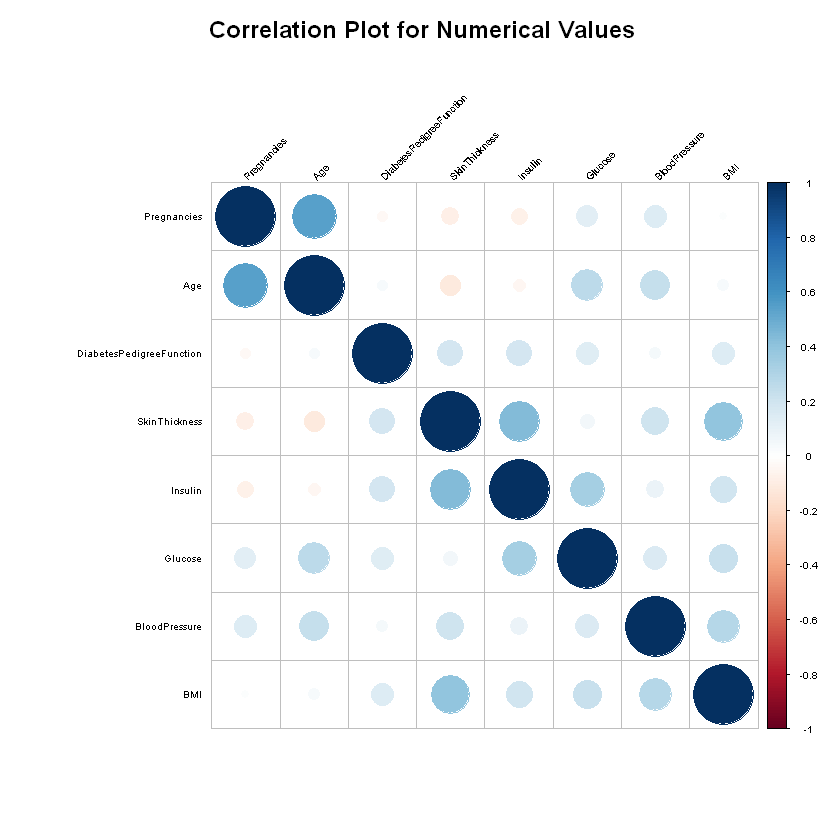

In [15]:
numeric.var <- sapply(df,is.numeric)
corr.matrix <- cor(df[,numeric.var])
corrplot(corr.matrix,main="\n\n Correlation Plot for Numerical Values",order="hclust",tl.col="black",tl.srt=45,tl.cex=0.5,cl.cex=0.5)

The numeric variabls are almost not correlated.

### Correlation bewteen numeric variables and outcome. 

In [16]:
attach(df)

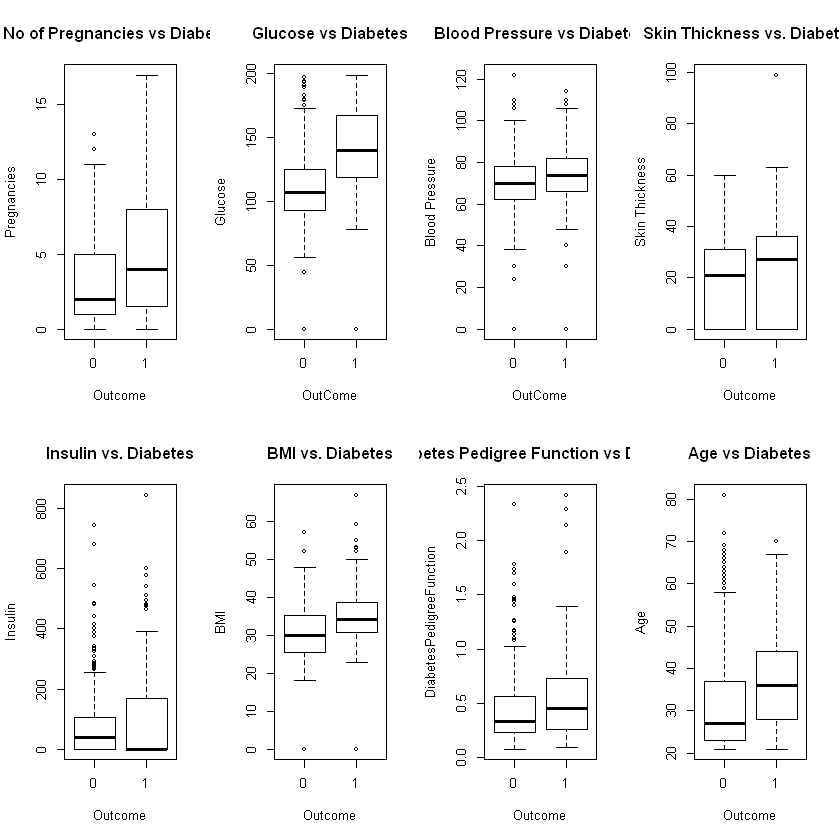

In [18]:
par(mfrow=c(2,4))
boxplot(Pregnancies~Outcome,main="No of Pregnancies vs Diabetes",
        xlab="Outcome",ylab="Pregnancies")
boxplot(Glucose~Outcome,main="Glucose vs Diabetes",xlab="OutCome",
        ylab="Glucose")
boxplot(BloodPressure~Outcome, main="Blood Pressure vs Diabetes",
        xlab="OutCome",ylab="Blood Pressure")
boxplot(SkinThickness~Outcome, main="Skin Thickness vs. Diabetes", 
        xlab="Outcome", ylab="Skin Thickness")
boxplot(Insulin~Outcome, main="Insulin vs. Diabetes", 
        xlab="Outcome", ylab="Insulin")
boxplot(BMI~Outcome, main="BMI vs. Diabetes", 
        xlab="Outcome", ylab="BMI")
boxplot(DiabetesPedigreeFunction~Outcome,main="Diabetes Pedigree Function vs Diabetes",xlab="Outcome",ylab="DiabetesPedigreeFunction")
boxplot(Age~Outcome,main="Age vs Diabetes",
        xlab="Outcome",ylab="Age")

Blood pressure and skin thickness show little variation with diabetes, they will be excluded from the model. Other variables show more or less correlation with diabetes, so will be kept.

# Logistic Regression 

In [19]:
df$BloodPressure <- NULL
df$SkinThickness <- NULL

In [20]:
head(df)

Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
8,183,0,23.3,0.672,32,1
1,89,94,28.1,0.167,21,0
0,137,168,43.1,2.288,33,1
5,116,0,25.6,0.201,30,0


In [21]:
train <- df[1:540,]
test <- df[541:768,]

In [22]:
model <- glm(Outcome ~.,family = binomial(link='logit'),data = train)

In [23]:
summary(model)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4366  -0.7741  -0.4312   0.8021   2.7310  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.3461752  0.8157916 -10.231  < 2e-16 ***
Pregnancies               0.1246856  0.0373214   3.341 0.000835 ***
Glucose                   0.0315778  0.0042497   7.431 1.08e-13 ***
Insulin                  -0.0013400  0.0009441  -1.419 0.155781    
BMI                       0.0881521  0.0164090   5.372 7.78e-08 ***
DiabetesPedigreeFunction  0.9642132  0.3430094   2.811 0.004938 ** 
Age                       0.0018904  0.0107225   0.176 0.860053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 700.47  on 539  degrees of freedom
Residual deviance: 526.56  on 533  degrees of freedom
AIC: 

In [24]:
anova(model,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,539,700.4723,NA
Pregnancies,1,26.31439847,538,674.1579,2.901177e-07
Glucose,1,102.95966029,537,571.1983,3.420425e-24
Insulin,1,0.06201367,536,571.1362,8.033411e-01
BMI,1,36.13545562,535,535.0008,1.840672e-09
DiabetesPedigreeFunction,1,8.41424283,534,526.5865,3.722928e-03
Age,1,0.03101786,533,526.5555,8.602005e-01


# Cross Validation

In [25]:
fitted.results <- predict(model,newdata = test,type='response')
fitted.results <- ifelse(fitted.results >0.5,1,0)
misclassifier <- mean(fitted.results != test$Outcome)
print(paste('Accuracy',1-misclassifier))

[1] "Accuracy 0.789473684210526"


# Decision Tree

In [26]:
library(rpart)

In [27]:
model2 <- rpart(Outcome ~ Pregnancies + Glucose+ BMI + DiabetesPedigreeFunction,data = train, method = "class")

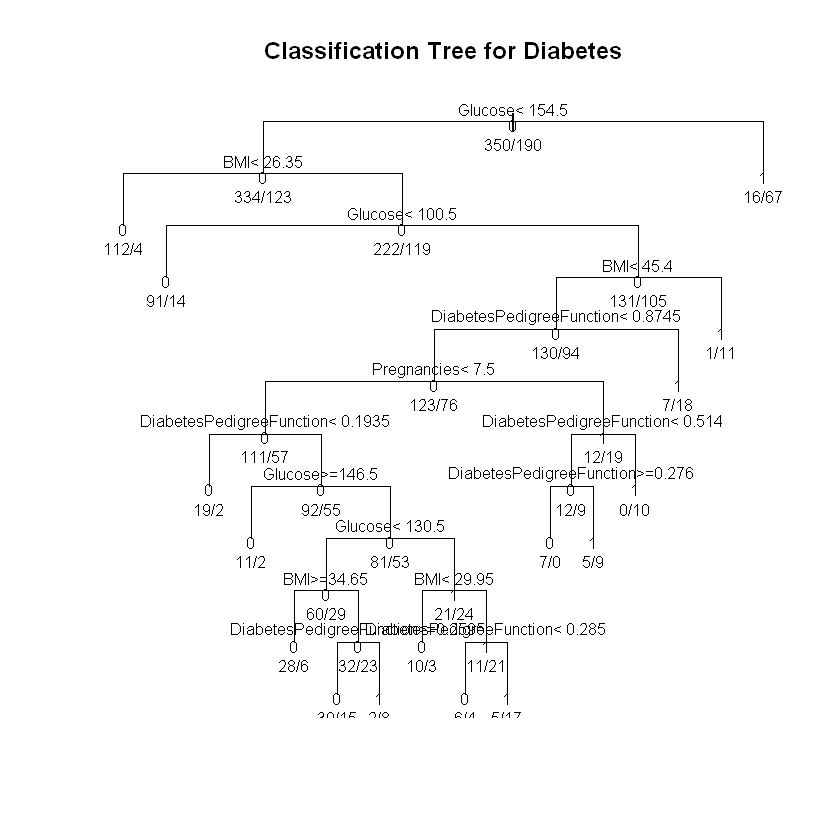

In [28]:
plot(model2,uniform=TRUE,
    main="Classification Tree for Diabetes")
text(model2,use.n=TRUE,all=TRUE,cex=.8)

In [29]:
tree_pred <- predict(model2,test,type='class')
table(tree_pred,test$Outcome)
mean(tree_pred ==test$Outcome)

         
tree_pred   0   1
        0 121  29
        1  29  49

[1] 0.745614